In [1]:
import numpy as np # linear algebra
import pandas as pd 
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
import os
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    BatchNormalization,
    ReLU,
    MaxPooling2D,
    Concatenate,
    GlobalMaxPooling2D,
    GlobalAveragePooling2D,
    Dropout,
    Dense,
    Lambda,
    Reshape,
    Activation,
    Multiply,
)
from keras.layers import Add
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras import layers

In [2]:
X_train = []
Y_train = []
image_size = 224
labels = ['adenocarcinoma','large','normal','squamous']
for i in labels:
    folderPath = os.path.join(r"E:\lung_cancer\Data\train",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(labels.index(i))

In [3]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [4]:
X_train.shape

(1000, 224, 224, 3)

In [5]:
def white_balance(channel, perc = 0.05):
    mi, ma = (np.percentile(channel, perc), np.percentile(channel,100.0-perc))
    channel = np.uint8(np.clip((channel-mi)*255.0/(ma-mi), 0, 255))
    return channel
def clahe():
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
    return clahe

In [6]:
def image_enhancer(image_arrays):
    """
    Argument: 
    image_arrays: a list containing arrays of images to be normalized
    
    returns:
    enhanced_images: a list of the enhanced images arrays
    """
    enhanced_images = []  # Create an empty list to store the enhanced images

    for image in image_arrays:
        # White Balance
        image_WB  = np.dstack([white_balance(channel, 0.05) for channel in cv2.split(image)])
        # Convert the white-balanced image to grayscale
        gray_image = cv2.cvtColor(image_WB, cv2.COLOR_RGB2GRAY)

        # CLAHE
        clahe_function = clahe()
        # Apply CLAHE to the grayscale image
        image_clahe = clahe_function.apply(gray_image)
        # Convert the CLAHE-enhanced image back to RGB
        image = cv2.cvtColor(image_clahe, cv2.COLOR_GRAY2RGB)
        
        # Append the enhanced image to the list
        enhanced_images.append(image)
    
    return enhanced_images


In [7]:
enhance_train=image_enhancer(X_train)

In [8]:
enhance_train=np.array(enhance_train)

In [9]:
enhance_train=enhance_train/255.0

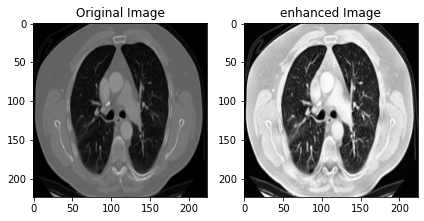

In [10]:
import matplotlib.pyplot as plt

# Assuming you have x_train and x_adversarial arrays available
# Assuming the shape of the RGB images is (image_height, image_width, channels)

# Specify the shape of the images
image_height = 224
image_width = 224
channels = 3

# Reshape the images if needed
original_image = X_train[22] #.reshape((image_height, image_width, channels))
adversarial_image =enhance_train[22] #.reshape((image_height, image_width, channels))
# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')

# Plot the adversarial image
plt.subplot(1, 2, 2)
plt.imshow(adversarial_image)
plt.title('enhanced Image')

# Display the plot
plt.tight_layout()
plt.show()


In [11]:
y = tf.keras.utils.to_categorical(Y_train)
X=enhance_train

**Proposed Model (Nadam,lr=0.001,categorical cross entropy)**

Epoch 1/30
25/25 [==============================] - 50s 2s/step - loss: 1.3804 - accuracy: 0.3438
Epoch 2/30
25/25 [==============================] - 50s 2s/step - loss: 1.3133 - accuracy: 0.3975
Epoch 3/30
25/25 [==============================] - 49s 2s/step - loss: 1.1168 - accuracy: 0.4775
Epoch 4/30
25/25 [==============================] - 51s 2s/step - loss: 1.0378 - accuracy: 0.5213
Epoch 5/30
25/25 [==============================] - 51s 2s/step - loss: 0.8214 - accuracy: 0.6425
Epoch 6/30
25/25 [==============================] - 46s 2s/step - loss: 0.7078 - accuracy: 0.7013
Epoch 7/30
25/25 [==============================] - 51s 2s/step - loss: 0.5150 - accuracy: 0.7837
Epoch 8/30
25/25 [==============================] - 52s 2s/step - loss: 0.4384 - accuracy: 0.8250
Epoch 9/30
25/25 [==============================] - 52s 2s/step - loss: 0.3469 - accuracy: 0.8725
Epoch 10/30
25/25 [==============================] - 53s 2s/step - loss: 0.2678 - accuracy: 0.9125
Epoch 11/30
25/25 [

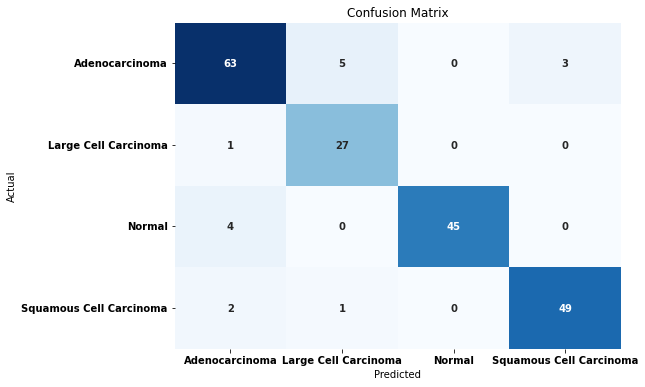

Epoch 1/30
25/25 [==============================] - 59s 2s/step - loss: 1.3997 - accuracy: 0.3300
Epoch 2/30
25/25 [==============================] - 53s 2s/step - loss: 1.2343 - accuracy: 0.4487
Epoch 3/30
25/25 [==============================] - 55s 2s/step - loss: 0.9366 - accuracy: 0.5675
Epoch 4/30
25/25 [==============================] - 53s 2s/step - loss: 0.7066 - accuracy: 0.6888
Epoch 5/30
25/25 [==============================] - 50s 2s/step - loss: 0.4725 - accuracy: 0.8125
Epoch 6/30
25/25 [==============================] - 53s 2s/step - loss: 0.3218 - accuracy: 0.8712
Epoch 7/30
25/25 [==============================] - 51s 2s/step - loss: 0.2104 - accuracy: 0.9250
Epoch 8/30
25/25 [==============================] - 53s 2s/step - loss: 0.3337 - accuracy: 0.8950
Epoch 9/30
25/25 [==============================] - 52s 2s/step - loss: 0.1244 - accuracy: 0.9613
Epoch 10/30
25/25 [==============================] - 53s 2s/step - loss: 0.1123 - accuracy: 0.9588
Epoch 11/30
25/25 [

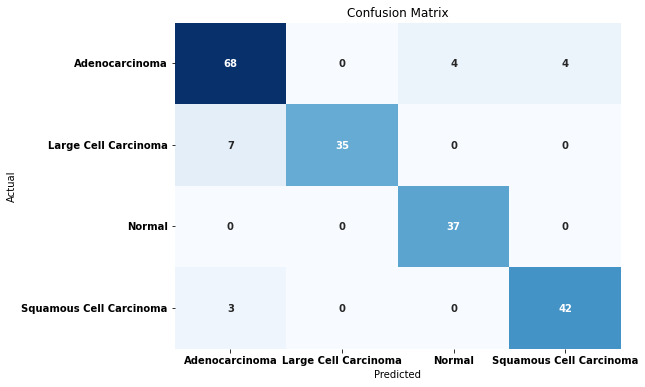

Epoch 1/30
25/25 [==============================] - 57s 2s/step - loss: 1.4251 - accuracy: 0.3400
Epoch 2/30
25/25 [==============================] - 51s 2s/step - loss: 1.3518 - accuracy: 0.3462
Epoch 3/30
25/25 [==============================] - 52s 2s/step - loss: 1.1759 - accuracy: 0.4288
Epoch 4/30
25/25 [==============================] - 47s 2s/step - loss: 1.0888 - accuracy: 0.4475
Epoch 5/30
25/25 [==============================] - 51s 2s/step - loss: 1.0752 - accuracy: 0.5088
Epoch 6/30
25/25 [==============================] - 51s 2s/step - loss: 0.8855 - accuracy: 0.5975
Epoch 7/30
25/25 [==============================] - 52s 2s/step - loss: 0.7402 - accuracy: 0.6787
Epoch 8/30
25/25 [==============================] - 52s 2s/step - loss: 0.6023 - accuracy: 0.7563
Epoch 9/30
25/25 [==============================] - 50s 2s/step - loss: 0.3856 - accuracy: 0.8413
Epoch 10/30
25/25 [==============================] - 49s 2s/step - loss: 0.2688 - accuracy: 0.8950
Epoch 11/30
25/25 [

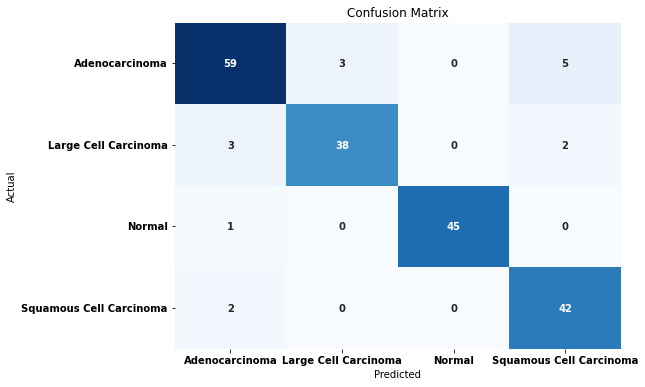

Epoch 1/30
25/25 [==============================] - 57s 2s/step - loss: 1.3629 - accuracy: 0.3487
Epoch 2/30
25/25 [==============================] - 51s 2s/step - loss: 1.2770 - accuracy: 0.3950
Epoch 3/30
25/25 [==============================] - 49s 2s/step - loss: 1.0565 - accuracy: 0.5263
Epoch 4/30
25/25 [==============================] - 48s 2s/step - loss: 0.8425 - accuracy: 0.6400
Epoch 5/30
25/25 [==============================] - 48s 2s/step - loss: 0.6509 - accuracy: 0.7287
Epoch 6/30
25/25 [==============================] - 49s 2s/step - loss: 0.5753 - accuracy: 0.7725
Epoch 7/30
25/25 [==============================] - 49s 2s/step - loss: 0.3897 - accuracy: 0.8388
Epoch 8/30
25/25 [==============================] - 47s 2s/step - loss: 0.3015 - accuracy: 0.8788
Epoch 9/30
25/25 [==============================] - 48s 2s/step - loss: 0.2195 - accuracy: 0.9100
Epoch 10/30
25/25 [==============================] - 50s 2s/step - loss: 0.2189 - accuracy: 0.9200
Epoch 11/30
25/25 [

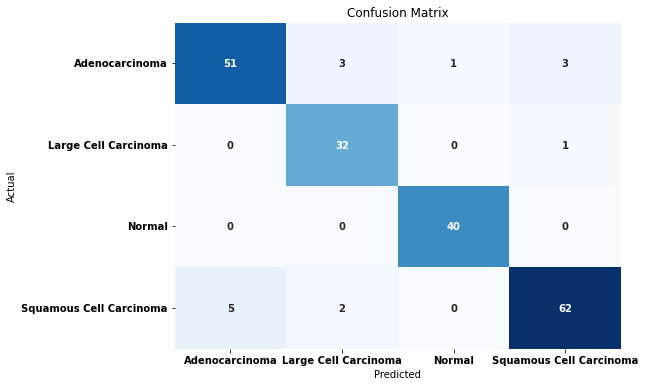

Epoch 1/30
25/25 [==============================] - 59s 2s/step - loss: 1.4014 - accuracy: 0.3413
Epoch 2/30
25/25 [==============================] - 51s 2s/step - loss: 1.3517 - accuracy: 0.3562
Epoch 3/30
25/25 [==============================] - 50s 2s/step - loss: 1.2241 - accuracy: 0.4263
Epoch 4/30
25/25 [==============================] - 47s 2s/step - loss: 0.9744 - accuracy: 0.5525
Epoch 5/30
25/25 [==============================] - 50s 2s/step - loss: 0.7650 - accuracy: 0.6725
Epoch 6/30
25/25 [==============================] - 51s 2s/step - loss: 0.5382 - accuracy: 0.7675
Epoch 7/30
25/25 [==============================] - 51s 2s/step - loss: 0.4641 - accuracy: 0.8288
Epoch 8/30
25/25 [==============================] - 51s 2s/step - loss: 0.3050 - accuracy: 0.8938
Epoch 9/30
25/25 [==============================] - 51s 2s/step - loss: 0.2100 - accuracy: 0.9125
Epoch 10/30
25/25 [==============================] - 49s 2s/step - loss: 0.2018 - accuracy: 0.9225
Epoch 11/30
25/25 [

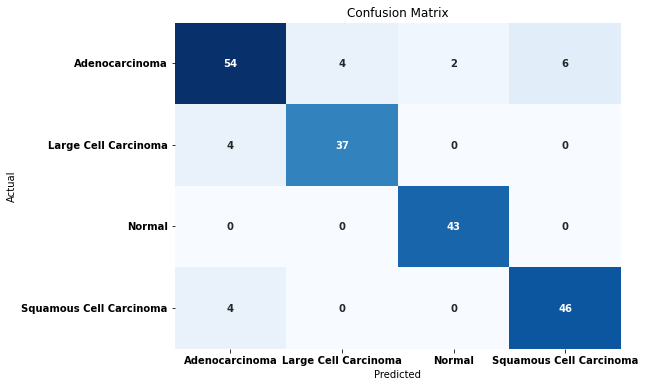

Accuracy List: [0.92, 0.91, 0.92, 0.925, 0.9]
Precision List: [0.9240454545454546, 0.9136680534029421, 0.9219166443312785, 0.9260227058702668, 0.8990176454370002]
Recall List: [0.92, 0.91, 0.92, 0.925, 0.9]
F1 List: [0.9207429368678061, 0.9096986346986347, 0.9201757113853887, 0.9247505801540891, 0.8990413324420677]
AUC List: [0.9899338798357912, 0.9895316055403774, 0.9915124859432959, 0.994495854976552, 0.981702504340054]
Average Test Accuracy: 0.915
Average Precision: 0.9169341007173883
Average Recall: 0.915
Average F1 Score: 0.9148818391095974
Average AUC Score: 0.9894352661272141


In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Add, GlobalAveragePooling2D, GlobalMaxPooling2D, Activation, Multiply
from tensorflow.keras.models import Model
from sklearn.utils import shuffle
def spatial_attention_block(C_A):
    x = Lambda(lambda x: K.mean(x, axis=-1, keepdims=True))(C_A)
    y = Lambda(lambda x: K.max(x, axis=-1, keepdims=True))(C_A)
    
    x = Concatenate()([x, y])
    x = Activation('relu')(x)
    x = Conv2D(1, 1, padding='same')(x)
    x = Activation('sigmoid')(x)
    S_A = Multiply()([x, C_A])
    
    return S_A

def self_attention(inp):
    shp = inp.shape
    a = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    a = Activation('relu')(a)
    
    b = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    b = Activation('relu')(b)
    
    c = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    c = Activation('relu')(c)
    
    a = Reshape((shp[1] * shp[2], shp[3] // 8))(a)
    b = Reshape((shp[1] * shp[2], shp[3] // 8))(b)
    b = K.permute_dimensions(b, (0, 2, 1))
    c = Reshape((shp[1] * shp[2], shp[3] // 8))(c)
    inter = K.batch_dot(a, b)
    inter = Activation('softmax')(inter)
    out = K.batch_dot(inter, c)
    out = Reshape((shp[1], shp[2], shp[3] // 8))(out)
    out = Conv2D(shp[3], 1, padding='same')(out)
    out = Activation('relu')(out)
    
    return out

def SqueezeAndExcitation(inputs, ratio=8):
    b, _, _, c = K.int_shape(inputs)
    x = GlobalAveragePooling2D()(inputs)
    x = Dense(c // ratio, activation="relu", use_bias=False)(x)
    x = Dense(c, activation="sigmoid", use_bias=False)(x)
    x = Multiply()([inputs, x])
    return x


def channel_attention(inputs):
    shape = K.int_shape(inputs)
    x = MaxPooling2D(pool_size=(shape[1], shape[2]))(inputs)
    x = Conv2D(shape[3] // 8, 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('relu')(x)
    x = Conv2D(shape[3], 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('sigmoid')(x)
    x = Multiply()([x, inputs])
    
    return x

def create_lightweight_cnn(input_shape,num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = AveragePooling2D((2, 2))(x)  # Average pooling layer added
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    a31 = self_attention(x)
    a32 = spatial_attention_block(x)
    a3 = Add()([a31, a32])
    x = channel_attention(a3)
    x = Conv2D(256, (3, 3), activation='relu')(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(4, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

 

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined create_lightweight_cnn and X, y
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
num_classes = 4  # Example number of classes
input_shape = (224, 224, 3)  # Example input shape (height, width, channels)
k = 5  # Number of folds for cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []
specificity_list = []  # New list for specificity

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create the model
    model = create_lightweight_cnn(input_shape, num_classes)
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=30)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate and store metrics
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    auc = roc_auc_score(y_true_classes, y_pred, multi_class='ovo')

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    
    
    # Append metrics to the respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc)

    # Display the confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'], 
                yticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'],
                annot_kws={"weight": "bold"})  # Set the font weight of annotations to bold

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Set labels to bold
    plt.xticks(fontweight="bold")
    plt.yticks(fontweight="bold")

    plt.show()

# Calculate the average of the individual metrics
average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)
average_auc = np.mean(auc_list)

print("Accuracy List:", accuracy_list)
print("Precision List:", precision_list)
print("Recall List:", recall_list)
print("F1 List:", f1_list)
print("AUC List:", auc_list)

# Print the average metrics
print("Average Test Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)
print("Average AUC Score:", average_auc)



**Resnet50**

Epoch 1/30
25/25 [==============================] - 64s 2s/step - loss: 1.3674 - accuracy: 0.3887
Epoch 2/30
25/25 [==============================] - 64s 3s/step - loss: 1.1343 - accuracy: 0.4650
Epoch 3/30
25/25 [==============================] - 65s 3s/step - loss: 1.0492 - accuracy: 0.4913
Epoch 4/30
25/25 [==============================] - 64s 3s/step - loss: 1.0035 - accuracy: 0.5288
Epoch 5/30
25/25 [==============================] - 63s 3s/step - loss: 0.9605 - accuracy: 0.5200
Epoch 6/30
25/25 [==============================] - 70s 3s/step - loss: 0.9764 - accuracy: 0.5462
Epoch 7/30
25/25 [==============================] - 70s 3s/step - loss: 0.9274 - accuracy: 0.5713
Epoch 8/30
25/25 [==============================] - 67s 3s/step - loss: 0.8941 - accuracy: 0.5700
Epoch 9/30
25/25 [==============================] - 67s 3s/step - loss: 0.8597 - accuracy: 0.5987
Epoch 10/30
25/25 [==============================] - 66s 3s/step - loss: 0.8335 - accuracy: 0.6162
Epoch 11/30
25/25 [

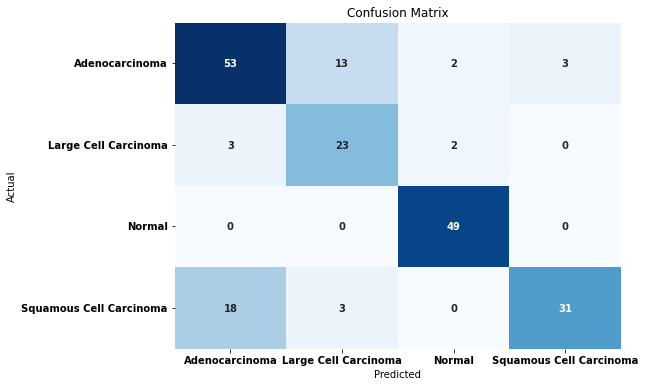

Epoch 1/30
25/25 [==============================] - 108s 4s/step - loss: 1.2565 - accuracy: 0.4350
Epoch 2/30
25/25 [==============================] - 100s 4s/step - loss: 1.0677 - accuracy: 0.4775
Epoch 3/30
25/25 [==============================] - 95s 4s/step - loss: 1.0315 - accuracy: 0.4888
Epoch 4/30
25/25 [==============================] - 94s 4s/step - loss: 0.9701 - accuracy: 0.5350
Epoch 5/30
25/25 [==============================] - 92s 4s/step - loss: 0.9270 - accuracy: 0.5888
Epoch 6/30
25/25 [==============================] - 94s 4s/step - loss: 0.9029 - accuracy: 0.5850
Epoch 7/30
25/25 [==============================] - 106s 4s/step - loss: 0.9392 - accuracy: 0.5387
Epoch 8/30
25/25 [==============================] - 98s 4s/step - loss: 0.9059 - accuracy: 0.5913
Epoch 9/30
25/25 [==============================] - 100s 4s/step - loss: 0.8826 - accuracy: 0.5900
Epoch 10/30
25/25 [==============================] - 97s 4s/step - loss: 0.8111 - accuracy: 0.6125
Epoch 11/30
25/

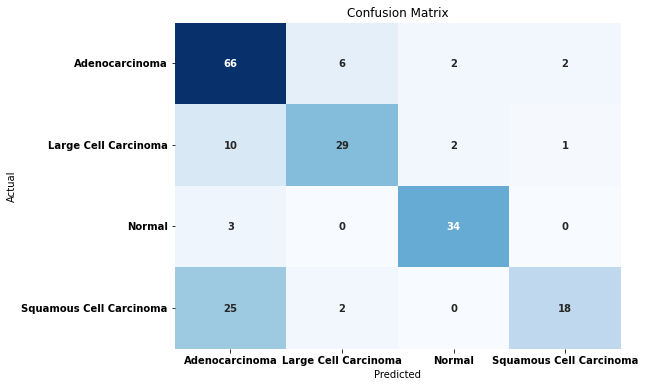

Epoch 1/30
25/25 [==============================] - 94s 4s/step - loss: 1.2575 - accuracy: 0.3988
Epoch 2/30
25/25 [==============================] - 88s 3s/step - loss: 1.0646 - accuracy: 0.4950
Epoch 3/30
25/25 [==============================] - 86s 3s/step - loss: 1.0081 - accuracy: 0.5250
Epoch 4/30
25/25 [==============================] - 85s 3s/step - loss: 0.9541 - accuracy: 0.5450
Epoch 5/30
25/25 [==============================] - 86s 3s/step - loss: 0.9395 - accuracy: 0.5663
Epoch 6/30
25/25 [==============================] - 88s 3s/step - loss: 0.8818 - accuracy: 0.5850
Epoch 7/30
25/25 [==============================] - 85s 3s/step - loss: 0.9012 - accuracy: 0.5600
Epoch 8/30
25/25 [==============================] - 88s 3s/step - loss: 0.8288 - accuracy: 0.6263
Epoch 9/30
25/25 [==============================] - 86s 4s/step - loss: 0.8369 - accuracy: 0.6037
Epoch 10/30
25/25 [==============================] - 90s 4s/step - loss: 0.7878 - accuracy: 0.6525
Epoch 11/30
25/25 [

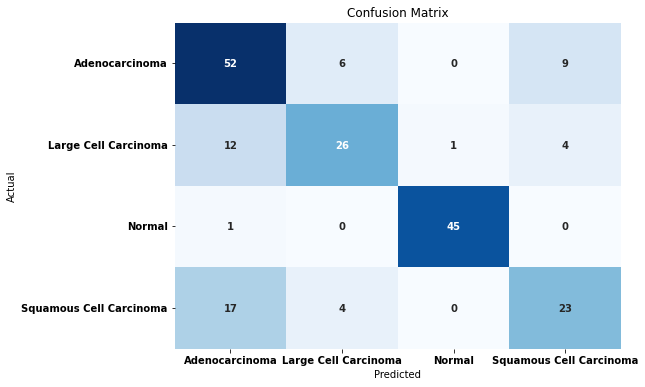

Epoch 1/30
25/25 [==============================] - 93s 3s/step - loss: 1.3304 - accuracy: 0.3812
Epoch 2/30
25/25 [==============================] - 93s 4s/step - loss: 1.1084 - accuracy: 0.4825
Epoch 3/30
25/25 [==============================] - 91s 4s/step - loss: 1.0151 - accuracy: 0.5375
Epoch 4/30
25/25 [==============================] - 90s 4s/step - loss: 0.9934 - accuracy: 0.5525
Epoch 5/30
25/25 [==============================] - 87s 4s/step - loss: 0.9504 - accuracy: 0.5425
Epoch 6/30
25/25 [==============================] - 95s 4s/step - loss: 0.9104 - accuracy: 0.5525
Epoch 7/30
25/25 [==============================] - 91s 4s/step - loss: 0.8753 - accuracy: 0.6150
Epoch 8/30
25/25 [==============================] - 87s 4s/step - loss: 0.9077 - accuracy: 0.5775
Epoch 9/30
25/25 [==============================] - 93s 4s/step - loss: 0.8627 - accuracy: 0.6250
Epoch 10/30
25/25 [==============================] - 95s 4s/step - loss: 0.8216 - accuracy: 0.6288
Epoch 11/30
25/25 [

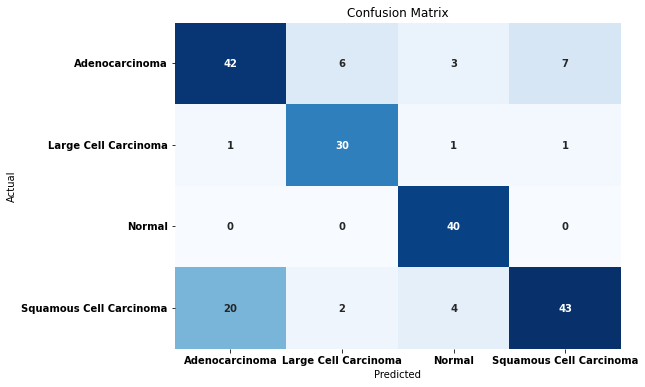

Epoch 1/30
25/25 [==============================] - 89s 3s/step - loss: 1.2996 - accuracy: 0.3913
Epoch 2/30
25/25 [==============================] - 93s 4s/step - loss: 1.1000 - accuracy: 0.4712
Epoch 3/30
25/25 [==============================] - 90s 4s/step - loss: 1.0582 - accuracy: 0.5000
Epoch 4/30
25/25 [==============================] - 87s 3s/step - loss: 1.0052 - accuracy: 0.5263
Epoch 5/30
25/25 [==============================] - 98s 4s/step - loss: 0.9646 - accuracy: 0.5350
Epoch 6/30
25/25 [==============================] - 93s 4s/step - loss: 0.9374 - accuracy: 0.5462
Epoch 7/30
25/25 [==============================] - 87s 4s/step - loss: 0.8883 - accuracy: 0.6037
Epoch 8/30
25/25 [==============================] - 92s 4s/step - loss: 0.9022 - accuracy: 0.5688
Epoch 9/30
25/25 [==============================] - 94s 4s/step - loss: 0.8867 - accuracy: 0.5962
Epoch 10/30
25/25 [==============================] - 89s 4s/step - loss: 0.8256 - accuracy: 0.6275
Epoch 11/30
25/25 [

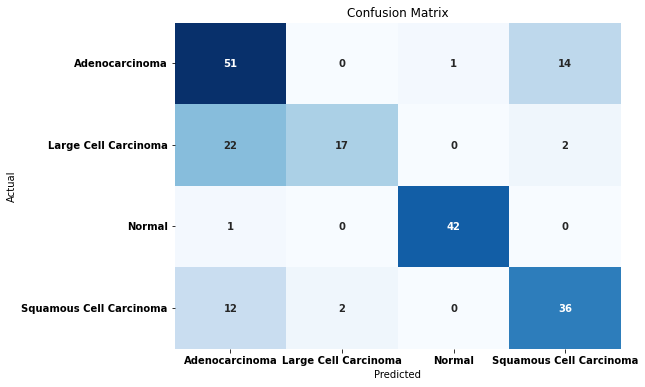

Accuracy List: [0.78, 0.735, 0.73, 0.775, 0.73]
Precision List: [0.8003891168125352, 0.7641318993950573, 0.7332723577235772, 0.7811455108359133, 0.7621956501271065]
Recall List: [0.78, 0.735, 0.73, 0.775, 0.73]
F1 List: [0.7784706616922463, 0.7233044879171462, 0.7268444906974767, 0.7698271155860784, 0.7240846233230136]
AUC List: [0.9421650421892949, 0.9355141011939256, 0.9288869245325903, 0.9537827361571741, 0.928807502134218]
Average Test Accuracy: 0.75
Average Precision: 0.768226906978838
Average Recall: 0.75
Average F1 Score: 0.7445062758431922
Average AUC Score: 0.9378312612414407


In [13]:
import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import img_to_array, load_img

num_classes =4  # Change this based on your specific case

# Assuming X is your data and y is your labels, and num_classes is the number of classes
# X and y should be loaded appropriately
# One-hot encode the labels
y = to_categorical(Y_train, num_classes)

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Load pre-trained ResNet50 model with imagenet weights
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze the base model layers
    base_model.trainable = False

    # Define the model
    input_tensor = tf.keras.Input(shape=(224, 224, 3))

    # Connect the input tensor to the ResNet50 base model
    x = base_model(input_tensor)

    # Add a GlobalAveragePooling2D layer
    x = layers.GlobalAveragePooling2D()(x)

    # Add Dense layers
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(x)

    # Output layer
    output_tensor = layers.Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = tf.keras.Model(inputs=input_tensor, outputs=output_tensor)

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=30)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate and store metrics
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    auc = roc_auc_score(y_true_classes, y_pred, multi_class='ovo')
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    # Append metrics to the respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc)

    # Display the confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'], 
                yticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'],
                annot_kws={"weight": "bold"})  # Set the font weight of annotations to bold

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Set labels to bold
    plt.xticks(fontweight="bold")
    plt.yticks(fontweight="bold")

    plt.show()


# Calculate the average of the individual metrics
average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)
average_auc = np.mean(auc_list)

print("Accuracy List:", accuracy_list)
print("Precision List:", precision_list)
print("Recall List:", recall_list)
print("F1 List:", f1_list)
print("AUC List:", auc_list)

# Print the average metrics
print("Average Test Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)
print("Average AUC Score:", average_auc)


**Inception V3**

Epoch 1/30
25/25 [==============================] - 37s 1s/step - loss: 1.1247 - accuracy: 0.4875
Epoch 2/30
25/25 [==============================] - 36s 1s/step - loss: 0.6934 - accuracy: 0.7025
Epoch 3/30
25/25 [==============================] - 37s 1s/step - loss: 0.5547 - accuracy: 0.7900
Epoch 4/30
25/25 [==============================] - 37s 1s/step - loss: 0.4352 - accuracy: 0.8400
Epoch 5/30
25/25 [==============================] - 38s 2s/step - loss: 0.3439 - accuracy: 0.8788
Epoch 6/30
25/25 [==============================] - 37s 1s/step - loss: 0.2494 - accuracy: 0.9212
Epoch 7/30
25/25 [==============================] - 36s 1s/step - loss: 0.2242 - accuracy: 0.9275
Epoch 8/30
25/25 [==============================] - 35s 1s/step - loss: 0.1421 - accuracy: 0.9688
Epoch 9/30
25/25 [==============================] - 37s 1s/step - loss: 0.1083 - accuracy: 0.9787
Epoch 10/30
25/25 [==============================] - 37s 1s/step - loss: 0.0847 - accuracy: 0.9862
Epoch 11/30
25/25 [

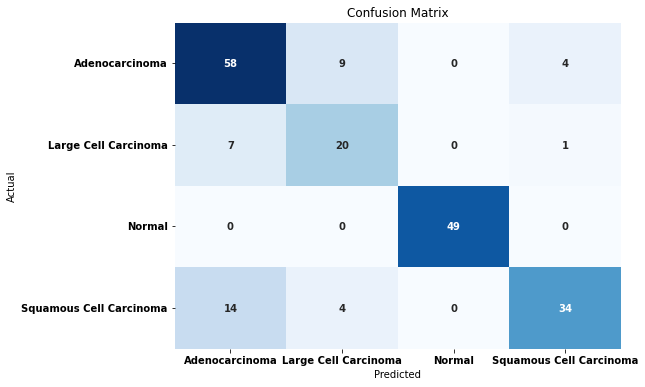

Epoch 1/30
25/25 [==============================] - 57s 2s/step - loss: 1.2309 - accuracy: 0.4812
Epoch 2/30
25/25 [==============================] - 50s 2s/step - loss: 0.7194 - accuracy: 0.7025
Epoch 3/30
25/25 [==============================] - 49s 2s/step - loss: 0.5920 - accuracy: 0.7700
Epoch 4/30
25/25 [==============================] - 52s 2s/step - loss: 0.4388 - accuracy: 0.8275
Epoch 5/30
25/25 [==============================] - 52s 2s/step - loss: 0.4420 - accuracy: 0.8125
Epoch 6/30
25/25 [==============================] - 51s 2s/step - loss: 0.3260 - accuracy: 0.8700
Epoch 7/30
25/25 [==============================] - 50s 2s/step - loss: 0.2609 - accuracy: 0.9013
Epoch 8/30
25/25 [==============================] - 49s 2s/step - loss: 0.2004 - accuracy: 0.9425
Epoch 9/30
25/25 [==============================] - 50s 2s/step - loss: 0.1331 - accuracy: 0.9737
Epoch 10/30
25/25 [==============================] - 50s 2s/step - loss: 0.0892 - accuracy: 0.9900
Epoch 11/30
25/25 [

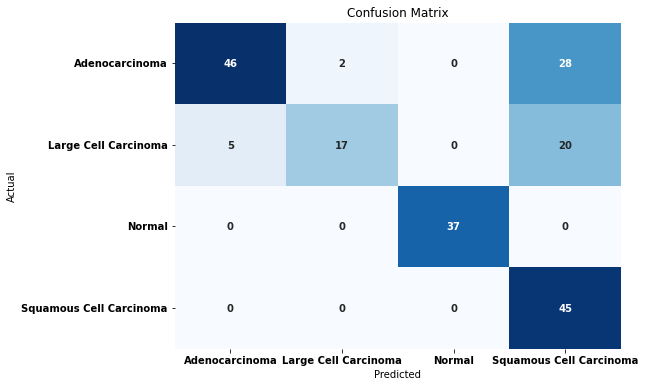

Epoch 1/30
25/25 [==============================] - 51s 2s/step - loss: 1.0901 - accuracy: 0.5250
Epoch 2/30
25/25 [==============================] - 51s 2s/step - loss: 0.7014 - accuracy: 0.7063
Epoch 3/30
25/25 [==============================] - 49s 2s/step - loss: 0.4988 - accuracy: 0.8112
Epoch 4/30
25/25 [==============================] - 49s 2s/step - loss: 0.3707 - accuracy: 0.8637
Epoch 5/30
25/25 [==============================] - 50s 2s/step - loss: 0.3051 - accuracy: 0.8875
Epoch 6/30
25/25 [==============================] - 52s 2s/step - loss: 0.2808 - accuracy: 0.9050
Epoch 7/30
25/25 [==============================] - 51s 2s/step - loss: 0.1665 - accuracy: 0.9488
Epoch 8/30
25/25 [==============================] - 46s 2s/step - loss: 0.1165 - accuracy: 0.9737
Epoch 9/30
25/25 [==============================] - 51s 2s/step - loss: 0.1136 - accuracy: 0.9688
Epoch 10/30
25/25 [==============================] - 52s 2s/step - loss: 0.0939 - accuracy: 0.9663
Epoch 11/30
25/25 [

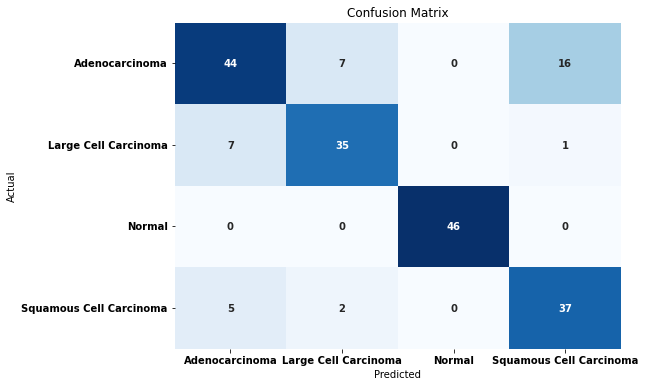

Epoch 1/30
25/25 [==============================] - 55s 2s/step - loss: 1.2278 - accuracy: 0.4775
Epoch 2/30
25/25 [==============================] - 51s 2s/step - loss: 0.8056 - accuracy: 0.6400
Epoch 3/30
25/25 [==============================] - 50s 2s/step - loss: 0.6003 - accuracy: 0.7688
Epoch 4/30
25/25 [==============================] - 51s 2s/step - loss: 0.5361 - accuracy: 0.7812
Epoch 5/30
25/25 [==============================] - 51s 2s/step - loss: 0.3867 - accuracy: 0.8438
Epoch 6/30
25/25 [==============================] - 51s 2s/step - loss: 0.3644 - accuracy: 0.8600
Epoch 7/30
25/25 [==============================] - 51s 2s/step - loss: 0.3453 - accuracy: 0.8587
Epoch 8/30
25/25 [==============================] - 50s 2s/step - loss: 0.2332 - accuracy: 0.9312
Epoch 9/30
25/25 [==============================] - 52s 2s/step - loss: 0.1764 - accuracy: 0.9500
Epoch 10/30
25/25 [==============================] - 52s 2s/step - loss: 0.1443 - accuracy: 0.9600
Epoch 11/30
25/25 [

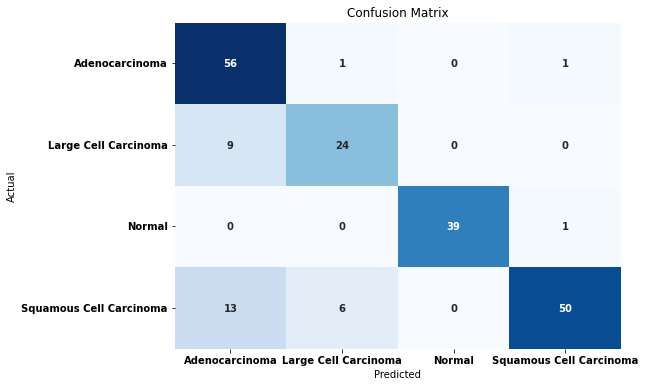

Epoch 1/30
25/25 [==============================] - 59s 2s/step - loss: 1.1689 - accuracy: 0.4837
Epoch 2/30
25/25 [==============================] - 58s 2s/step - loss: 0.6989 - accuracy: 0.6975
Epoch 3/30
25/25 [==============================] - 60s 2s/step - loss: 0.5351 - accuracy: 0.7975
Epoch 4/30
25/25 [==============================] - 65s 3s/step - loss: 0.4434 - accuracy: 0.8238
Epoch 5/30
25/25 [==============================] - 56s 2s/step - loss: 0.3078 - accuracy: 0.8975
Epoch 6/30
25/25 [==============================] - 60s 2s/step - loss: 0.3147 - accuracy: 0.8712
Epoch 7/30
25/25 [==============================] - 59s 2s/step - loss: 0.2531 - accuracy: 0.9050
Epoch 8/30
25/25 [==============================] - 49s 2s/step - loss: 0.2028 - accuracy: 0.9275
Epoch 9/30
25/25 [==============================] - 52s 2s/step - loss: 0.1199 - accuracy: 0.9737
Epoch 10/30
25/25 [==============================] - 51s 2s/step - loss: 0.0953 - accuracy: 0.9787
Epoch 11/30
25/25 [

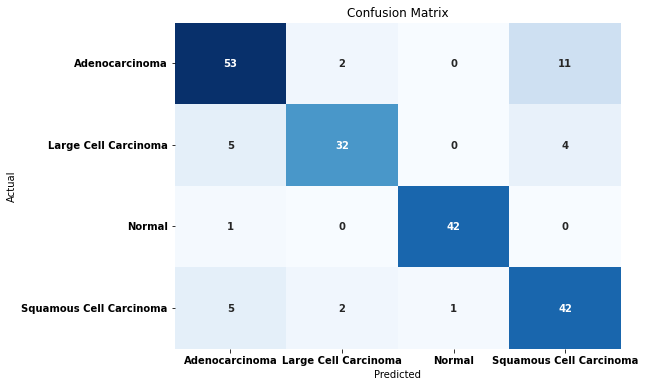

Accuracy List: [0.805, 0.725, 0.81, 0.845, 0.845]
Precision List: [0.8171480629075566, 0.8245108026232565, 0.8149777537277538, 0.8676778329197685, 0.8497139985380118]
Recall List: [0.805, 0.725, 0.81, 0.845, 0.845]
F1 List: [0.8056223263075722, 0.7240639013138326, 0.8087857514746858, 0.8451658507842933, 0.8457282157095242]
AUC List: [0.9438687330682157, 0.9541828325819554, 0.9509393011045516, 0.9707309539674608, 0.9652190939456963]
Average Test Accuracy: 0.8059999999999998
Average Precision: 0.8348056901432693
Average Recall: 0.8059999999999998
Average F1 Score: 0.8058732091179817
Average AUC Score: 0.956988182933576


In [14]:
import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import img_to_array, load_img

num_classes = 4  # Change this based on your specific case

# Assuming X is your data and y is your labels, and num_classes is the number of classes
# X and y should be loaded appropriately
# One-hot encode the labels
y = to_categorical(Y_train, num_classes)

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Load pre-trained InceptionV3 model with imagenet weights
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze the base model layers
    base_model.trainable = False

    # Define the model
    input_tensor = tf.keras.Input(shape=(224, 224, 3))

    # Connect the input tensor to the InceptionV3 base model
    x = base_model(input_tensor)

    # Add a GlobalAveragePooling2D layer
    x = layers.GlobalAveragePooling2D()(x)

    # Add Dense layers
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(x)

    # Output layer
    output_tensor = layers.Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = tf.keras.Model(inputs=input_tensor, outputs=output_tensor)

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=30)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate and store metrics
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    auc = roc_auc_score(y_true_classes, y_pred, multi_class='ovo')
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    # Append metrics to the respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc)

    # Display the confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Adenocarcinoma', 'Large Cell Carcinoma', 'Normal', 'Squamous Cell Carcinoma'],
                yticklabels=['Adenocarcinoma', 'Large Cell Carcinoma', 'Normal', 'Squamous Cell Carcinoma'],
                annot_kws={"weight": "bold"})  # Set the font weight of annotations to bold

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Set labels to bold
    plt.xticks(fontweight="bold")
    plt.yticks(fontweight="bold")

    plt.show()

# Calculate the average of the individual metrics
average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)
average_auc = np.mean(auc_list)

print("Accuracy List:", accuracy_list)
print("Precision List:", precision_list)
print("Recall List:", recall_list)
print("F1 List:", f1_list)
print("AUC List:", auc_list)

# Print the average metrics
print("Average Test Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)
print("Average AUC Score:", average_auc)


**AlexNet**

In [16]:
def AlexNet():
        inp = layers.Input((224, 224, 3))
        x = layers.Conv2D(96, 11, 4, activation='relu')(inp)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D(3, 2)(x)
        x = layers.Conv2D(256, 5, 1, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D(3, 2)(x)
        x = layers.Conv2D(384, 3, 1, activation='relu')(x)
        x = layers.Conv2D(384, 3, 1, activation='relu')(x)
        x = layers.Conv2D(256, 3, 1, activation='relu')(x)
        x = layers.MaxPooling2D(3, 2)(x)
        x = layers.Flatten()(x)
        x = layers.Dense(4096, activation='relu')(x)
        x = layers.Dropout(0.5)(x)
        x = layers.Dense(4096, activation='relu')(x)
        x = layers.Dropout(0.5)(x)
        x = layers.Dense(4, activation='softmax')(x)

        model = Model(inputs=inp, outputs=x)
        return model

Epoch 1/30
25/25 [==============================] - 36s 1s/step - loss: 1.9709 - accuracy: 0.3562
Epoch 2/30
25/25 [==============================] - 31s 1s/step - loss: 1.1108 - accuracy: 0.5050
Epoch 3/30
25/25 [==============================] - 31s 1s/step - loss: 0.9406 - accuracy: 0.5900
Epoch 4/30
25/25 [==============================] - 32s 1s/step - loss: 0.8651 - accuracy: 0.6187
Epoch 5/30
25/25 [==============================] - 32s 1s/step - loss: 0.7591 - accuracy: 0.6875
Epoch 6/30
25/25 [==============================] - 31s 1s/step - loss: 0.7751 - accuracy: 0.7138
Epoch 7/30
25/25 [==============================] - 31s 1s/step - loss: 0.6826 - accuracy: 0.7113
Epoch 8/30
25/25 [==============================] - 31s 1s/step - loss: 0.5361 - accuracy: 0.7887
Epoch 9/30
25/25 [==============================] - 32s 1s/step - loss: 0.5604 - accuracy: 0.7750
Epoch 10/30
25/25 [==============================] - 30s 1s/step - loss: 0.4840 - accuracy: 0.8025
Epoch 11/30
25/25 [

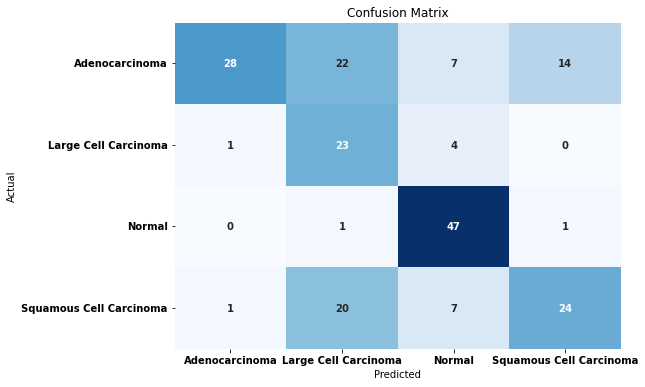

Epoch 1/30
25/25 [==============================] - 49s 2s/step - loss: 1.8806 - accuracy: 0.3638
Epoch 2/30
25/25 [==============================] - 41s 2s/step - loss: 1.0744 - accuracy: 0.4925
Epoch 3/30
25/25 [==============================] - 42s 2s/step - loss: 0.9630 - accuracy: 0.5763
Epoch 4/30
25/25 [==============================] - 43s 2s/step - loss: 0.7552 - accuracy: 0.6525
Epoch 5/30
25/25 [==============================] - 37s 1s/step - loss: 0.7316 - accuracy: 0.6837
Epoch 6/30
25/25 [==============================] - 44s 2s/step - loss: 0.6626 - accuracy: 0.7063
Epoch 7/30
25/25 [==============================] - 44s 2s/step - loss: 0.6789 - accuracy: 0.6712
Epoch 8/30
25/25 [==============================] - 41s 2s/step - loss: 0.5078 - accuracy: 0.7738
Epoch 9/30
25/25 [==============================] - 44s 2s/step - loss: 0.4271 - accuracy: 0.8125
Epoch 10/30
25/25 [==============================] - 41s 2s/step - loss: 0.6255 - accuracy: 0.7212
Epoch 11/30
25/25 [

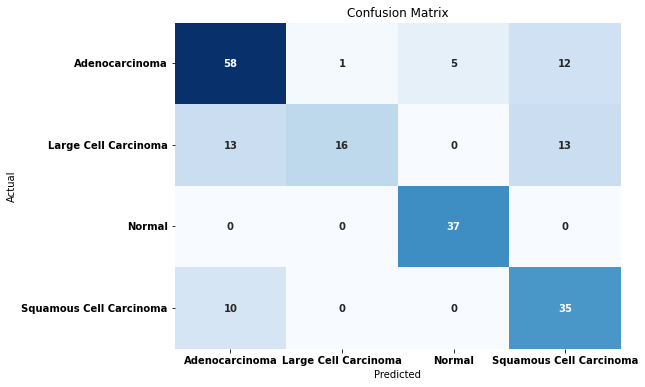

Epoch 1/30
25/25 [==============================] - 52s 2s/step - loss: 1.6864 - accuracy: 0.3887
Epoch 2/30
25/25 [==============================] - 42s 2s/step - loss: 1.2035 - accuracy: 0.4613
Epoch 3/30
25/25 [==============================] - 39s 2s/step - loss: 1.0321 - accuracy: 0.5487
Epoch 4/30
25/25 [==============================] - 45s 2s/step - loss: 0.8561 - accuracy: 0.5938
Epoch 5/30
25/25 [==============================] - 44s 2s/step - loss: 0.8265 - accuracy: 0.6313
Epoch 6/30
25/25 [==============================] - 41s 2s/step - loss: 0.8058 - accuracy: 0.6712
Epoch 7/30
25/25 [==============================] - 42s 2s/step - loss: 0.6801 - accuracy: 0.7150
Epoch 8/30
25/25 [==============================] - 46s 2s/step - loss: 0.6037 - accuracy: 0.7163
Epoch 9/30
25/25 [==============================] - 40s 2s/step - loss: 0.5263 - accuracy: 0.7800
Epoch 10/30
25/25 [==============================] - 43s 2s/step - loss: 0.4004 - accuracy: 0.8313
Epoch 11/30
25/25 [

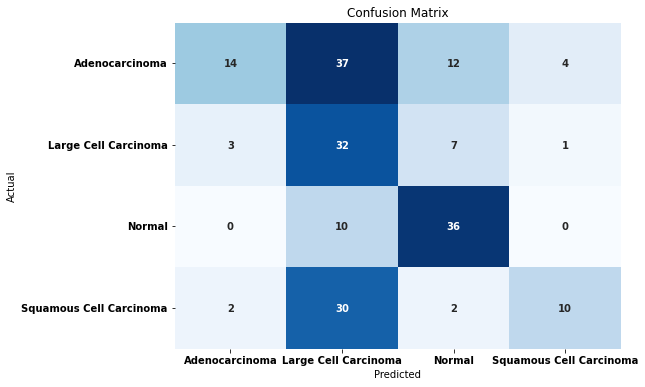

Epoch 1/30
25/25 [==============================] - 70s 2s/step - loss: 1.7285 - accuracy: 0.3650
Epoch 2/30
25/25 [==============================] - 49s 2s/step - loss: 1.0550 - accuracy: 0.5263
Epoch 3/30
25/25 [==============================] - 49s 2s/step - loss: 0.8927 - accuracy: 0.5850
Epoch 4/30
25/25 [==============================] - 43s 2s/step - loss: 0.7812 - accuracy: 0.6662
Epoch 5/30
25/25 [==============================] - 48s 2s/step - loss: 0.7859 - accuracy: 0.6925
Epoch 6/30
25/25 [==============================] - 45s 2s/step - loss: 0.7637 - accuracy: 0.6888
Epoch 7/30
25/25 [==============================] - 42s 2s/step - loss: 0.7976 - accuracy: 0.7013
Epoch 8/30
25/25 [==============================] - 51s 2s/step - loss: 0.6133 - accuracy: 0.7387
Epoch 9/30
25/25 [==============================] - 45s 2s/step - loss: 0.5485 - accuracy: 0.7738
Epoch 10/30
25/25 [==============================] - 40s 2s/step - loss: 0.4022 - accuracy: 0.8225
Epoch 11/30
25/25 [

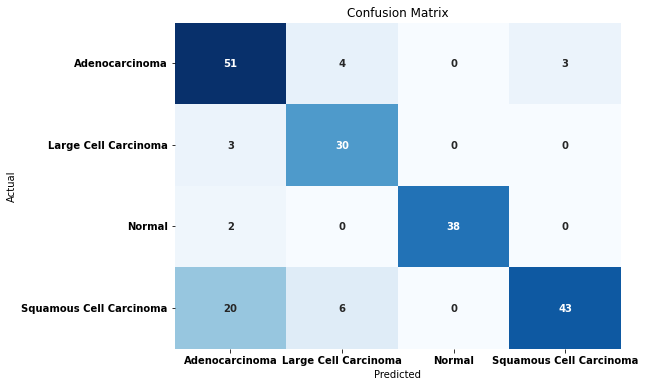

Epoch 1/30
25/25 [==============================] - 57s 2s/step - loss: 1.6674 - accuracy: 0.3587
Epoch 2/30
25/25 [==============================] - 43s 2s/step - loss: 1.1355 - accuracy: 0.5138
Epoch 3/30
25/25 [==============================] - 43s 2s/step - loss: 0.8798 - accuracy: 0.5975
Epoch 4/30
25/25 [==============================] - 41s 2s/step - loss: 0.8161 - accuracy: 0.6225
Epoch 5/30
25/25 [==============================] - 45s 2s/step - loss: 0.8105 - accuracy: 0.6300
Epoch 6/30
25/25 [==============================] - 41s 2s/step - loss: 0.7075 - accuracy: 0.6800
Epoch 7/30
25/25 [==============================] - 45s 2s/step - loss: 0.7342 - accuracy: 0.6963
Epoch 8/30
25/25 [==============================] - 42s 2s/step - loss: 0.6808 - accuracy: 0.7262
Epoch 9/30
25/25 [==============================] - 43s 2s/step - loss: 0.4784 - accuracy: 0.7862
Epoch 10/30
25/25 [==============================] - 40s 2s/step - loss: 0.4800 - accuracy: 0.8350
Epoch 11/30
25/25 [

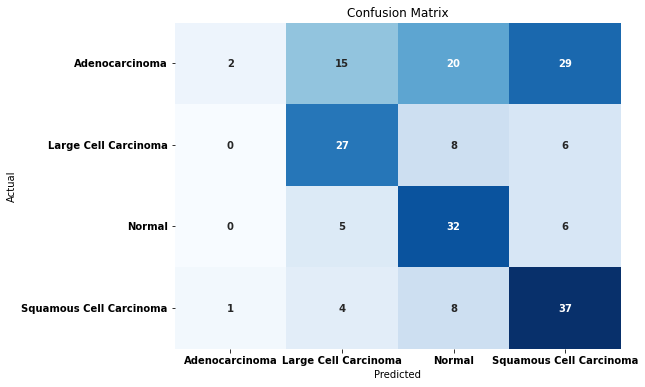

Accuracy List: [0.61, 0.73, 0.46, 0.81, 0.49]
Precision List: [0.7172750582750583, 0.7639720147318186, 0.6018911958796073, 0.8408552631578948, 0.5482956259426848]
Recall List: [0.61, 0.73, 0.46, 0.81, 0.49]
F1 List: [0.6045027224686953, 0.7179537755354432, 0.4349490534469011, 0.8092345018846756, 0.4079517357030944]
AUC List: [0.8811445991490544, 0.9265504382828943, 0.6940850571803177, 0.9617937401248872, 0.7901919936746937]
Average Test Accuracy: 0.6199999999999999
Average Precision: 0.6944578315974128
Average Recall: 0.6199999999999999
Average F1 Score: 0.5949183578077619
Average AUC Score: 0.8507531656823695


In [17]:
from tensorflow.keras.models import Model

num_classes = 4  # Change this based on your specific case

# Assuming X is your data and y is your labels, and num_classes is the number of classes
# X and y should be loaded appropriately
# One-hot encode the labels
y = to_categorical(Y_train, num_classes)

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

# Inside the K-fold loop
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Load AlexNet model
    model = AlexNet()

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=30)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate and store metrics
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    auc = roc_auc_score(y_true_classes, y_pred, multi_class='ovo')
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    # Append metrics to the respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc)

    # Display the confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Adenocarcinoma', 'Large Cell Carcinoma', 'Normal', 'Squamous Cell Carcinoma'],
                yticklabels=['Adenocarcinoma', 'Large Cell Carcinoma', 'Normal', 'Squamous Cell Carcinoma'],
                annot_kws={"weight": "bold"})  # Set the font weight of annotations to bold

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Set labels to bold
    plt.xticks(fontweight="bold")
    plt.yticks(fontweight="bold")

    plt.show()
    
# Calculate the average of the individual metrics
average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)
average_auc = np.mean(auc_list)

print("Accuracy List:", accuracy_list)
print("Precision List:", precision_list)
print("Recall List:", recall_list)
print("F1 List:", f1_list)
print("AUC List:", auc_list)

# Print the average metrics
print("Average Test Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)
print("Average AUC Score:", average_auc)
    
